In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
telecom_data = pd.read_csv('telecom_data.csv',
#                            sep='\t',
                           index_col =0)
telecom_data.drop('index', axis=1, inplace=True)
# print(telecom_data.columns)
print(telecom_data.isna().sum())
telecom_data

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     5575-GNVDE    Male            No      No         No      34   
1     3668-QPYBK    Male            No      No         No       2   
2     7795-CFOCW    Male            No      No         No      45   
3     9237-HQITU  Female            No      No         No       2   
4     9305-CDSKC  Female            No      No         No       8   
...          ...     ...           ...     ...        ...     ...   
6038  2569-WGERO  Female            No      No         No      72   
6039  6840-RESVB    Male            No     Yes        Yes      24   
6040  2234-XADUH  Female            No     Yes        Yes      72   
6041  8361-LTMKD    Male           Yes     Yes         No       4   
6042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL            Yes  ...   
1             Yes                No             DSL            Yes  ...   
2              No  No phone service             DSL            Yes  ...   
3             Yes                No     Fiber optic             No  ...   
4             Yes               Yes     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
6038          Yes                No              No             No  ...   
6039          Yes               Yes             DSL            Yes  ...   
6040          Yes               Yes     Fiber optic             No  ...   
6041          Yes               Yes     Fiber optic             No  ...   
6042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                 Yes          No          No              No        One year   
1                  No          No          No              No  Month-to-month   
2                 Yes         Yes          No              No        One year   
3                  No          No          No              No  Month-to-month   
4                 Yes          No         Yes             Yes  Month-to-month   
...               ...         ...         ...             ...             ...   
6038               No          No          No              No        Two year   
6039              Yes         Yes         Yes             Yes        One year   
6040              Yes          No         Yes             Yes        One year   
6041               No          No          No              No  Month-to-month   
6042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                  No               Mailed check          56.95       1889.50   
1                 Yes               Mailed check          53.85        108.15   
2                  No  Bank transfer (automatic)          42.30       1840.75   
3                 Yes           Electronic check          70.70        151.65   
4                 Yes           Electronic check          99.65        820.50   
...               ...                        ...            ...           ...   
6038              Yes  Bank transfer (automatic)          21.15       1419.40   
6039              Yes               Mailed check          84.80       1990.50   
6040              Yes    Credit card (automatic)         103.20       7362.90   
6041              Yes               Mailed check          74.40        306.60   
6042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1       Yes  
2        No  
3       Yes  
4       Yes  
...     ...  
6038     No  
6039     No  
6040     No  
6041    Yes  
6042     No  

[6043 rows x 21 columns]

In [3]:
features_1 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for feature in features_1:
    print(telecom_data[feature].value_counts())

No     4162
Yes    1881
Name: OnlineSecurity, dtype: int64
No     3899
Yes    2144
Name: OnlineBackup, dtype: int64
No     3906
Yes    2137
Name: DeviceProtection, dtype: int64
No     4143
Yes    1900
Name: TechSupport, dtype: int64
No     3784
Yes    2259
Name: StreamingTV, dtype: int64
No     3761
Yes    2282
Name: StreamingMovies, dtype: int64


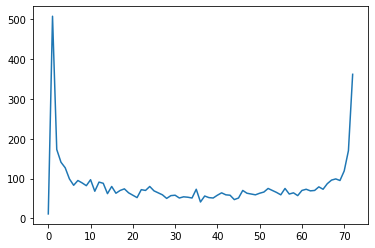

In [4]:
tenure = telecom_data['tenure']
plt.plot(tenure.value_counts().sort_index().index, 
         tenure.value_counts().sort_index())
plt.show()


In [5]:
discr_bins = [i for i in range(0, 61, 12)] + [np.inf]
print(discr_bins)
tenure_discr = pd.cut(tenure, discr_bins, right=False)
telecom_data['tenure_group'] = tenure_discr
tenure_discr

[0, 12, 24, 36, 48, 60, inf]


0       [24.0, 36.0)
1        [0.0, 12.0)
2       [36.0, 48.0)
3        [0.0, 12.0)
4        [0.0, 12.0)
            ...     
6038     [60.0, inf)
6039    [24.0, 36.0)
6040     [60.0, inf)
6041     [0.0, 12.0)
6042     [60.0, inf)
Name: tenure, Length: 6043, dtype: category
Categories (6, interval[float64]): [[0.0, 12.0) < [12.0, 24.0) < [24.0, 36.0) < [36.0, 48.0) < [48.0, 60.0) < [60.0, inf)]

In [6]:
for feature in telecom_data.columns:
    print(f'======\n{feature}: \n{telecom_data[feature].value_counts()}')

customerID: 
8718-PTMEZ    1
9786-YWNHU    1
8630-QSGXK    1
6713-OKOMC    1
9391-EOYLI    1
             ..
7563-BIUPC    1
7321-PKUYW    1
6807-SIWJI    1
6137-MFAJN    1
8241-JUIQO    1
Name: customerID, Length: 6043, dtype: int64
gender: 
Male      3070
Female    2973
Name: gender, dtype: int64
SeniorCitizen: 
No     5170
Yes     873
Name: SeniorCitizen, dtype: int64
Partner: 
Yes    3055
No     2988
Name: Partner, dtype: int64
Dependents: 
No     4085
Yes    1958
Name: Dependents, dtype: int64
tenure: 
1     508
72    362
2     173
71    170
3     141
     ... 
39     51
28     50
44     47
36     41
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService: 
Yes    5463
No      580
Name: PhoneService, dtype: int64
MultipleLines: 
No                  2940
Yes                 2523
No phone service     580
Name: MultipleLines, dtype: int64
InternetService: 
Fiber optic    2377
DSL            2145
No             1521
Name: InternetService, dtype: int64
OnlineSecurity: 
No     416

In [7]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'tenure_group', 'Churn']

In [8]:
def change_yes_no(value: str) -> int:
    if value.lower() == 'yes':
        return 1
    if value.lower() == 'no':
        return 0
    if value.lower() == 'male':
        return 1
    if value.lower() == 'female':
        return 0

In [9]:
two_val_cat = 0
many_val_cat = 0
for feature in categorical_features:
#     if telecom_data[feature].isnull().sum() != 0:
    if len(set(telecom_data[feature])) == 2:
        telecom_data[feature] = telecom_data[feature].apply(change_yes_no)
        two_val_cat += 1
        
    else:
        telecom_data = pd.concat([telecom_data, pd.get_dummies(telecom_data[feature], prefix=feature)], axis=1)
        telecom_data.drop(feature, axis=1, inplace=True)
        many_val_cat += 1
print(f'2 values: {two_val_cat}, more values and one-hot: {many_val_cat}')
telecom_data

2 values: 13, more values and one-hot: 5


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     5575-GNVDE       1              0        0           0      34   
1     3668-QPYBK       1              0        0           0       2   
2     7795-CFOCW       1              0        0           0      45   
3     9237-HQITU       0              0        0           0       2   
4     9305-CDSKC       0              0        0           0       8   
...          ...     ...            ...      ...         ...     ...   
6038  2569-WGERO       0              0        0           0      72   
6039  6840-RESVB       1              0        1           1      24   
6040  2234-XADUH       0              0        1           1      72   
6041  8361-LTMKD       1              1        1           0       4   
6042  3186-AJIEK       1              0        0           0      66   

      PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                1               1             0                 1  ...   
1                1               1             1                 0  ...   
2                0               1             0                 1  ...   
3                1               0             0                 0  ...   
4                1               0             0                 1  ...   
...            ...             ...           ...               ...  ...   
6038             1               0             0                 0  ...   
6039             1               1             0                 1  ...   
6040             1               0             1                 1  ...   
6041             1               0             0                 0  ...   
6042             1               1             0                 1  ...   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   
...                                       ...   
6038                                        1   
6039                                        0   
6040                                        0   
6041                                        0   
6042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               1   
4                                         0                               1   
...                                     ...                             ...   
6038                                      0                               0   
6039                                      0                               0   
6040                                      1                               0   
6041                                      0                               0   
6042                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_[0.0, 12.0)  \
0                              1                         0   
1                              1                         1   
2                              0                         0   
3                              0                         1   
4                              0                         1   
...                          ...                       ...   
6038                           0                         0   
6039                           1                         0   
6040                           0                         0   
6041                           1                         1   
6042                

In [89]:
telecom_data['Churn'].value_counts()

0    4174
1    1869
Name: Churn, dtype: int64

In [10]:
telecom_data = telecom_data.drop('customerID', axis=1)
telecom_data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        0           0      34             1   
1          1              0        0           0       2             1   
2          1              0        0           0      45             0   
3          0              0        0           0       2             1   
4          0              0        0           0       8             1   
...      ...            ...      ...         ...     ...           ...   
6038       0              0        0           0      72             1   
6039       1              0        1           1      24             1   
6040       0              0        1           1      72             1   
6041       1              1        1           0       4             1   
6042       1              0        0           0      66             1   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0                  1             0                 1            0  ...   
1                  1             1                 0            0  ...   
2                  1             0                 1            1  ...   
3                  0             0                 0            0  ...   
4                  0             0                 1            0  ...   
...              ...           ...               ...          ...  ...   
6038               0             0                 0            0  ...   
6039               1             0                 1            1  ...   
6040               0             1                 1            0  ...   
6041               0             0                 0            0  ...   
6042               1             0                 1            1  ...   

      PaymentMethod_Bank transfer (automatic)  \
0                                           0   
1                                           0   
2                                           1   
3                                           0   
4                                           0   
...                                       ...   
6038                                        1   
6039                                        0   
6040                                        0   
6041                                        0   
6042                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               0   
1                                         0                               0   
2                                         0                               0   
3                                         0                               1   
4                                         0                               1   
...                                     ...                             ...   
6038                                      0                               0   
6039                                      0                               0   
6040                                      1                               0   
6041                                      0                               0   
6042                                      0                               0   

      PaymentMethod_Mailed check  tenure_group_[0.0, 12.0)  \
0                              1                         0   
1                              1                         1   
2                              0                         0   
3                              0                         1   
4                              0                         1   
...                          ...                       ...   
6038                           0                         0   
6039                           1                         0   
6040                           0                         0   
6041                           1                         1   
6042    

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = telecom_data.drop('Churn', axis=1).values
y = telecom_data['Churn']
y_pred_log_reg = np.array([np.NaN for _ in y])
y_pred_rf = np.array([np.NaN for _ in y])


clf_log_reg = LogisticRegression(random_state=2020, max_iter=10000)
clf_rf = RandomForestClassifier(random_state=2020)
scores_log_reg = cross_val_score(clf_log_reg, X, y, cv=5, scoring='accuracy')
scores_rf = cross_val_score(clf_rf, X, y, cv=5, scoring='accuracy')
scores_log_reg, scores_rf


(array([0.8808933 , 0.89412738, 0.90074442, 0.88162252, 0.8865894 ]),
 array([0.88668321, 0.89660877, 0.88254756, 0.87334437, 0.88990066]))

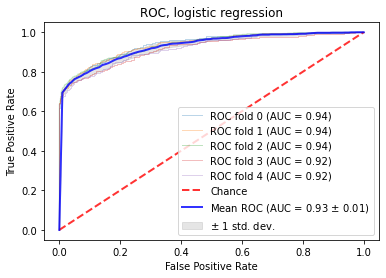

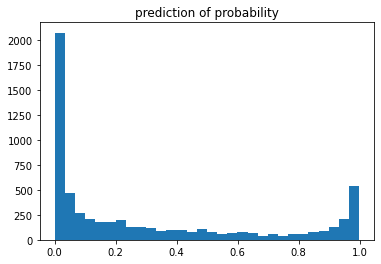

<Figure size 432x288 with 0 Axes>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold, KFold


n_samples, n_features = X.shape


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
# cv = KFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf_log_reg.fit(X[train], y[train])
#     print(clf_log_reg.predict_proba(X[test]))
    y_pred_log_reg[test] = clf_log_reg.predict_proba(X[test])[:,1]
    viz = plot_roc_curve(clf_log_reg, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC, logistic regression")
ax.legend(loc="lower right")
plt.show()

plt.hist(y_pred_log_reg, bins=30)
plt.title('prediction of probability')
plt.figure()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

THRESHOLD = 0.5
preds = np.where(y_pred_log_reg[:] > THRESHOLD, 1, 0)

conf_mat = confusion_matrix(y, preds)

print(conf_mat)


tn, fp, fn, tp = conf_mat.ravel()
tn, fp, fn, tp

[[3953  221]
 [ 451 1418]]


(3953, 221, 451, 1418)

In [41]:
def compute_costs(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: number of clients
    """
    return (tp + fp) * discount * price


def compute_gains(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: number of clients
    """
    return (tp) * acceptance_rate * price


def compute_losses(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: number of clients
    """
    return fn * price + tp * (1 - acceptance_rate) * (1 - discount) * price


def compute_losses_without_strategy(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: number of clients
    """
    return (tp + fn) * price


def compute_profit(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: number of clients
    """
    gains = compute_gains(tn, tp, fn, fp, acceptance_rate, discount, price)
    costs = compute_costs(tn, tp, fn, fp, acceptance_rate, discount, price)
    losses = compute_losses(tn, tp, fn, fp, acceptance_rate, discount, price)
    return gains - costs - losses


def compute_total_profit(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: number of clients
    """
    total_profit = tp * acceptance_rate * (1-discount) * price + fp * (1-discount) * price + tn * price
    return total_profit
    


In [112]:
price = telecom_data['MonthlyCharges'].mean()
print(telecom_data['MonthlyCharges'].sum(), telecom_data[telecom_data['Churn'] == 0]['MonthlyCharges'].sum())
price

379849.45 240718.59999999998


62.85776104583816

In [109]:
X.shape

(6043, 34)




Strategy B: 
discount: 0.3, acceptance_rate: 0.9
tn: 3953, tp: 1418, fn: 451, fp: 221
accuracy: 0.89
gains: 80219.07, 
costs: 30907.16, 
losses: 34588.11,             
losses_without_strategy: 117481.16
profit: -8745453.72, total_profit: 314354.18
profit_per_customer: -2095.22,             
total_profit_per_customer: 57.68
ratio total_profit_per_customer/price: 0.92
highest profit: 314354.18, threshold: 0.5
tn: 3953, tp: 1418, fn: 451, fp: 221
clients stayed: 5450.2, left: 592.8000000000002
highest accuracy: 0.90, threshold: 0.6
highest profit_per_customer: 59.88, threshold: 0.9
ratio: 0.95
tn: 4174, tp: 871, fn: 998, fp: 0



Strategy A: 
discount: 0.2, acceptance_rate: 0.75
tn: 3953, tp: 1418, fn: 451, fp: 221
accuracy: 0.89
gains: 66849.23, 
costs: 20604.77, 
losses: 46175.31,             
losses_without_strategy: 117481.16
profit: -8745453.72, total_profit: 313069.36
profit_per_customer: -2095.22,             
total_profit_per_customer: 59.77
ratio total_profit_per_customer/pric

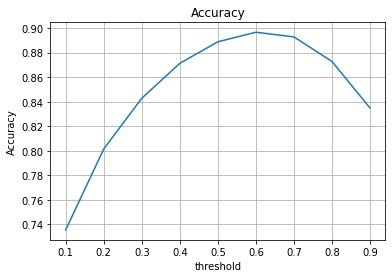

<Figure size 432x288 with 0 Axes>

highest accuracy: 0.90, threshold: 0.6


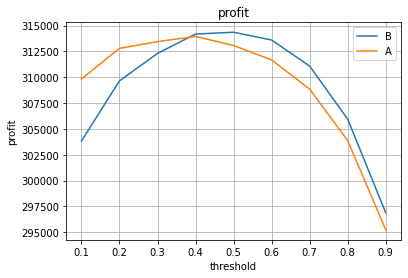

<Figure size 432x288 with 0 Axes>

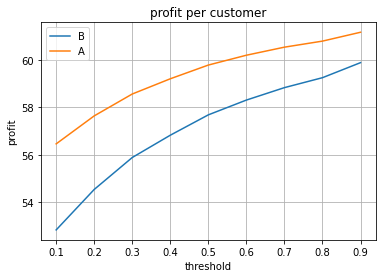

<Figure size 432x288 with 0 Axes>

In [119]:
thresholds = np.arange(0.1, 1, 0.1)
# thresholds = np.linspace(0, 1, 50)

strategy_profits = dict()
strategy_profits_per_customer = dict()

for strategy, discount, acceptance_rate in [('B', 0.3, 0.9), 
                                            ('A', 0.2, 0.75)
                                           ]:
    all_accuracy = []
#     all_profits = []
    all_total_profits = []
#     all_profits_per_customer = []
    all_total_profits_per_customer = []
    
    print(f'\n\n\nStrategy {strategy}: \ndiscount: {discount}, acceptance_rate: {acceptance_rate}')
    
    for threshold in thresholds:
#         print(f'\nthreshold: {threshold}\n')
        
        preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
        conf_mat = confusion_matrix(y, preds)
        tn, fp, fn, tp = conf_mat.ravel()
        
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        
        gains = compute_gains(tn, tp, fn, fp, acceptance_rate, discount, price)
        costs = compute_costs(tn, tp, fn, fp, acceptance_rate, discount, price)
        losses = compute_losses(tn, tp, fn, fp, acceptance_rate, discount, price)
        losses_without_strategy = compute_losses_without_strategy(tn, tp, fn, fp, acceptance_rate, discount, price)

#         profit = compute_profit(tn, tp, fn, fp, acceptance_rate, discount, price)
        total_profit = compute_total_profit(tn, tp, fn, fp, acceptance_rate, discount, price)

        n_customers = tp * acceptance_rate + fp + tn
#         profit_per_customer = profit / n_customers
        total_profit_per_customer = total_profit / n_customers
        
        all_accuracy.append(accuracy)
#         all_profits.append(profit)
        all_total_profits.append(total_profit)
#         all_profits_per_customer.append(profit_per_customer)
        all_total_profits_per_customer.append(total_profit_per_customer)

        if threshold == 0.5:
            print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')
            print(f'accuracy: {accuracy:.2f}')
            print(f'gains: {gains:.2f}, \ncosts: {costs:.2f}, \nlosses: {losses:.2f}, \
            \nlosses_without_strategy: {losses_without_strategy:.2f}')
            print(f'profit: {profit:.2f}, total_profit: {total_profit:.2f}')
            print(f'profit_per_customer: {profit_per_customer:.2f}, \
            \ntotal_profit_per_customer: {total_profit_per_customer:.2f}')
            print(f'ratio total_profit_per_customer/price: {total_profit_per_customer / price:.2f}')
       
    strategy_profits[strategy] = all_total_profits
    strategy_profits_per_customer[strategy] = all_total_profits_per_customer
        
        
    max_index = np.argmax(all_total_profits)
    print(f'highest profit: {all_total_profits[max_index]:.2f}, threshold: {thresholds[max_index]}')
    threshold = thresholds[max_index]
    preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
    conf_mat = confusion_matrix(y, preds)
    tn, fp, fn, tp = conf_mat.ravel()
    print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')
    n_stayed = tp * acceptance_rate + fp + tn 
    print(f'clients stayed: {n_stayed}, left: {X.shape[0] - n_stayed}')
    
        
    max_index = np.argmax(all_accuracy)
    print(f'highest accuracy: {all_accuracy[max_index]:.2f}, threshold: {thresholds[max_index]}')
    max_index = np.argmax(all_total_profits_per_customer)
    print(f'highest profit_per_customer: {all_total_profits_per_customer[max_index]:.2f}, threshold: {thresholds[max_index]}')
    print(f'ratio: {all_total_profits_per_customer[max_index] / price:.2f}')
    threshold = thresholds[max_index]
    preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
    conf_mat = confusion_matrix(y, preds)
    tn, fp, fn, tp = conf_mat.ravel()
    print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')
    
    
plt.plot(thresholds, all_accuracy)
plt.title('Accuracy')
plt.xlabel('threshold')
plt.ylabel('Accuracy')
plt.grid()
plt.figure()
plt.show()
max_index = np.argmax(all_accuracy)
print(f'highest accuracy: {all_accuracy[max_index]:.2f}, threshold: {thresholds[max_index]}')


for strategy, profits in strategy_profits.items():
    plt.plot(thresholds, profits, label=strategy)
plt.title('profit')
plt.xlabel('threshold')
plt.ylabel('profit')
plt.legend(loc='best')
plt.grid()
plt.figure()
plt.show()

for strategy, profits in strategy_profits_per_customer.items():
    plt.plot(thresholds, profits, label=strategy)
plt.title('profit per customer')
plt.xlabel('threshold')
plt.ylabel('profit')
plt.legend(loc='best')
plt.grid()
plt.figure()
plt.show()
    
# losses_without_strategy: 117481.15539467151

In [120]:
def prepare_tfpn(telecom_data, preds):
    TN = (telecom_data['Churn'] == 0 ) & (preds == 0)
    TP = (telecom_data['Churn'] == 1 ) & (preds == 1)
    FN = (telecom_data['Churn'] == 1 ) & (preds == 0)
    FP = (telecom_data['Churn'] == 0 ) & (preds == 1)
    tn = telecom_data['MonthlyCharges'][TN].sum()
    tp = telecom_data['MonthlyCharges'][TP].sum()
    fn = telecom_data['MonthlyCharges'][FN].sum()
    fp = telecom_data['MonthlyCharges'][FP].sum()
    return tn, tp, fn, fp, TN, TP, FN, FP
    


def compute_costs_individually(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: sum of MonthlyCharges of the group
    """
    return (tp + fp) * discount


def compute_gains_individually(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: sum of MonthlyCharges of the group
    """
    return (tp) * acceptance_rate


def compute_losses_individually(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: sum of MonthlyCharges of the group
    """
    return fn + tp * (1 - acceptance_rate) * (1 - discount)


def compute_losses_without_strategy_individually(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: sum of MonthlyCharges of the group
    """
    return (tp + fn)


def compute_profit_individually(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: sum of MonthlyCharges of the group
    """
    gains = compute_gains(tn, tp, fn, fp, acceptance_rate, discount, price)
    costs = compute_costs(tn, tp, fn, fp, acceptance_rate, discount, price)
    losses = compute_losses(tn, tp, fn, fp, acceptance_rate, discount, price)
    return gains - costs - losses


def compute_total_profit_individually(tn, tp, fn, fp, acceptance_rate, discount, price):
    """
    acceptance_rate: probability that client will not churn - e.g. 0.8
    discount: discount (e.g. 0.3)
    price: average price per customer
    tn, tp, fn, fp: sum of MonthlyCharges of the group
    """
    total_profit = tp * acceptance_rate * (1-discount) + fp * (1-discount) + tn
    return total_profit




Strategy B: 
discount: 0.3, acceptance_rate: 0.9
tn: 3953, tp: 1418, fn: 451, fp: 221
accuracy: 0.89
gains: 99198.58, 
costs: 37921.99, 
losses: 36625.65,             
losses_without_strategy: 139130.85
profit: 1549503.18, total_profit: 305301.81
profit_per_customer: 284.30,             
total_profit_per_customer: 56.02
ratio total_profit_per_customer/price: 0.89
highest profit: 305301.81, threshold: 0.5
tn: 3953, tp: 1418, fn: 451, fp: 221
clients stayed: 5450.2, left: 592.8000000000002
highest accuracy: 0.90, threshold: 0.6
highest profit_per_customer: 57.56, threshold: 0.9
ratio: 0.92
tn: 4174, tp: 871, fn: 998, fp: 0



Strategy A: 
discount: 0.2, acceptance_rate: 0.75
tn: 3953, tp: 1418, fn: 451, fp: 221
accuracy: 0.89
gains: 82665.49, 
costs: 25281.33, 
losses: 50954.33,             
losses_without_strategy: 139130.85
profit: 404164.56, total_profit: 303613.79
profit_per_customer: 77.17,             
total_profit_per_customer: 57.97
ratio total_profit_per_customer/price: 0.92


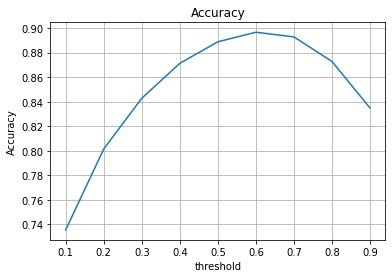

<Figure size 432x288 with 0 Axes>

highest accuracy: 0.90, threshold: 0.6


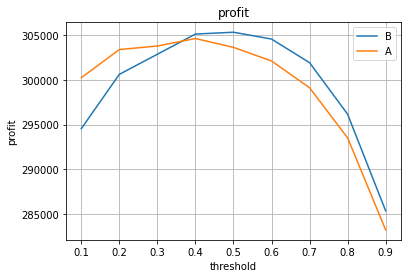

<Figure size 432x288 with 0 Axes>

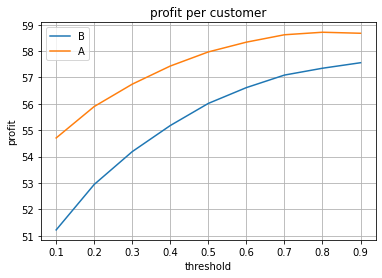

<Figure size 432x288 with 0 Axes>

In [123]:

thresholds = np.arange(0.1, 1, 0.1)
# thresholds = [0.5]

strategy_real_profits = dict()
strategy_real_profits_per_customer = dict()

for strategy, discount, acceptance_rate in [('B', 0.3, 0.9), 
                                            ('A', 0.2, 0.75)
                                           ]:
    all_accuracy = []
    all_profits = []
    all_total_profits = []
    all_profits_per_customer = []
    all_total_profits_per_customer = []
    
    print(f'\n\n\nStrategy {strategy}: \ndiscount: {discount}, acceptance_rate: {acceptance_rate}')
    
    for threshold in thresholds:
#         print(f'\nthreshold: {threshold}\n')
        
        preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
        
        tn, tp, fn, fp, TN, TP, FN, FP = prepare_tfpn(telecom_data, preds)
        
        
        accuracy = (TP.sum() + TN.sum()) / (TP.sum() + TN.sum() + FP.sum() + FN.sum())
        
        gains = compute_gains_individually(tn, tp, fn, fp, acceptance_rate, discount, price)
        costs = compute_costs_individually(tn, tp, fn, fp, acceptance_rate, discount, price)
        losses = compute_losses_individually(tn, tp, fn, fp, acceptance_rate, discount, price)
        losses_without_strategy = compute_losses_without_strategy_individually(tn, tp, fn, fp, acceptance_rate, discount, price)

        profit = compute_profit_individually(tn, tp, fn, fp, acceptance_rate, discount, price)
        total_profit = compute_total_profit_individually(tn, tp, fn, fp, acceptance_rate, discount, price)

        n_customers = TP.sum() * acceptance_rate + FP.sum() + TN.sum()
        profit_per_customer = profit / n_customers
        total_profit_per_customer = total_profit / n_customers
        
        all_accuracy.append(accuracy)
        all_profits.append(profit)
        all_total_profits.append(total_profit)
        all_profits_per_customer.append(profit_per_customer)
        all_total_profits_per_customer.append(total_profit_per_customer)

        if threshold == 0.5:
            print(f'tn: {TN.sum()}, tp: {TP.sum()}, fn: {FN.sum()}, fp: {FP.sum()}')
            print(f'accuracy: {accuracy:.2f}')
            print(f'gains: {gains:.2f}, \ncosts: {costs:.2f}, \nlosses: {losses:.2f}, \
            \nlosses_without_strategy: {losses_without_strategy:.2f}')
            print(f'profit: {profit:.2f}, total_profit: {total_profit:.2f}')
            print(f'profit_per_customer: {profit_per_customer:.2f}, \
            \ntotal_profit_per_customer: {total_profit_per_customer:.2f}')
            print(f'ratio total_profit_per_customer/price: {total_profit_per_customer / price:.2f}')
        
        
    
    max_index = np.argmax(all_total_profits)
    print(f'highest profit: {all_total_profits[max_index]:.2f}, threshold: {thresholds[max_index]}')
    strategy_real_profits[strategy] = all_total_profits
    threshold = thresholds[max_index]
    preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
    conf_mat = confusion_matrix(y, preds)
    tn, fp, fn, tp = conf_mat.ravel()
    print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')
    n_stayed = tp * acceptance_rate + fp + tn 
    print(f'clients stayed: {n_stayed}, left: {X.shape[0] - n_stayed}')
    
    
        
    max_index = np.argmax(all_accuracy)
    print(f'highest accuracy: {all_accuracy[max_index]:.2f}, threshold: {thresholds[max_index]}')
    max_index = np.argmax(all_total_profits_per_customer)
    print(f'highest profit_per_customer: {all_total_profits_per_customer[max_index]:.2f}, threshold: {thresholds[max_index]}')
    strategy_real_profits_per_customer[strategy] = all_total_profits_per_customer
    print(f'ratio: {all_total_profits_per_customer[max_index] / price:.2f}')
    threshold = thresholds[max_index]
    preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
    conf_mat = confusion_matrix(y, preds)
    tn, fp, fn, tp = conf_mat.ravel()
    print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')
    
    
plt.plot(thresholds, all_accuracy)
plt.title('Accuracy')
plt.xlabel('threshold')
plt.ylabel('Accuracy')
plt.grid()
plt.figure()
plt.show()
max_index = np.argmax(all_accuracy)
print(f'highest accuracy: {all_accuracy[max_index]:.2f}, threshold: {thresholds[max_index]}')


for strategy, profits in strategy_real_profits.items():
    plt.plot(thresholds, profits, label=strategy)
plt.title('profit')
plt.xlabel('threshold')
plt.ylabel('profit')
plt.legend(loc='best')
plt.grid()
plt.figure()
plt.show()

for strategy, profits in strategy_real_profits_per_customer.items():
    plt.plot(thresholds, profits, label=strategy)
plt.title('profit per customer')
plt.xlabel('threshold')
plt.ylabel('profit')
plt.legend(loc='best')
plt.grid()
plt.figure()
plt.show()
    
        
# losses_without_strategy: 117481.15539467151

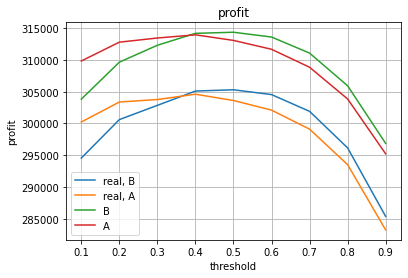

<Figure size 432x288 with 0 Axes>

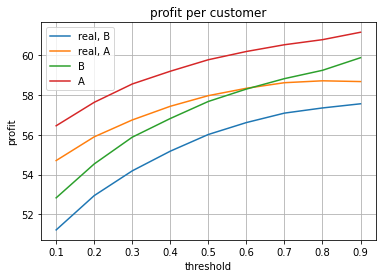

<Figure size 432x288 with 0 Axes>

In [124]:
for strategy, profits in strategy_real_profits.items():
    plt.plot(thresholds, profits, label=f'real, {strategy}')
for strategy, profits in strategy_profits.items():
    plt.plot(thresholds, profits, label=strategy)
plt.title('profit')
plt.xlabel('threshold')
plt.ylabel('profit')
plt.legend(loc='best')
plt.grid()
plt.figure()
plt.show()

for strategy, profits in strategy_real_profits_per_customer.items():
    plt.plot(thresholds, profits, label=f'real, {strategy}')   
for strategy, profits in strategy_profits_per_customer.items():
    plt.plot(thresholds, profits, label=strategy)
plt.title('profit per customer')
plt.xlabel('threshold')
plt.ylabel('profit')
plt.legend(loc='best')
plt.grid()
plt.figure()
plt.show()

In [ ]:

    print(f'highest accuracy: {all_total_profits_per_customer[max_index]:.2f}, threshold: {thresholds[max_index]}')
    max_index = np.argmax(all_total_profits_per_customer)
    print(f'highest profit_per_customer: {all_total_profits_per_customer[max_index]:.2f}, threshold: {thresholds[max_index]}')
    print(f'ratio: {all_total_profits_per_customer[max_index] / price:.2f}')
    threshold = thresholds[max_index]
    preds = np.where(y_pred_log_reg[:] > threshold, 1, 0)
    conf_mat = confusion_matrix(y, preds)
    tn, fp, fn, tp = conf_mat.ravel()
    print(f'tn: {tn}, tp: {tp}, fn: {fn}, fp: {fp}')
    
        
# losses_without_strategy: 117481.15539467151

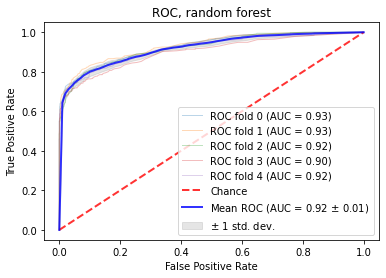

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


n_samples, n_features = X.shape


# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf_rf.fit(X[train], y[train])
#     importances = clf_rf.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
#                  axis=0)
#     indices = np.argsort(importances)[::-1]

#     # Print the feature ranking
#     print("Feature ranking:")

#     for f in range(min(X.shape[1], 10)):
#     #         if importances[indices[f]] > 0.01:
#         print("%d. feature %d - %s (%f)" % (f + 1, indices[f], telecom_data.columns[indices[f]], importances[indices[f]]))

#     # Plot the impurity-based feature importances of the clf_rf
    
#     plt.title(f"Feature importances")
#     plt.bar(range(X.shape[1]), importances[indices],
#             color="r", yerr=std[indices], align="center")
#     plt.xticks(range(X.shape[1]), indices)
#     plt.xlim([-1, X.shape[1]])
# #     plt.legend(loc='best')
#     plt.figure()
#     plt.show()
    viz = plot_roc_curve(clf_rf, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC, random forest")
ax.legend(loc="lower right")
plt.show()

[[3953  221]
 [ 451 1418]]


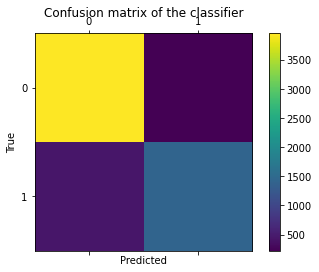

(3953, 221, 451, 1418)

In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
# labels = ['0', '1']

print(conf_mat)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
tn, fp, fn, tp = conf_mat.ravel()
tn, fp, fn, tp

In [72]:
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import cycle

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import label_binarize
# from sklearn.multiclass import OneVsRestClassifier
# from scipy import interp
# from sklearn.metrics import roc_auc_score


# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
#                                                     random_state=0)

# y_score = clf.fit(X_train, y_train).decision_function(X_test)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(2):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



# plt.figure()
# lw = 2
# plt.plot(fpr[0], tpr[0], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()


In [240]:
age_mean = titanic_df.groupby(['Sex',
                               'Survived', 
                               'Passenger Class'
                              ])['Age'].mean()
age_mean

Sex     Survived  Passenger Class
Female  No        First              35.200000
                  Second             34.090909
                  Third              23.418750
        Yes       First              37.109375
                  Second             26.711051
                  Third              20.814815
Male    No        First              43.658163
                  Second             33.092593
                  Third              26.679598
        Yes       First              36.168240
                  Second             17.449274
                  Third              22.436441
Name: Age, dtype: float64

In [241]:
dead_or_alive = titanic_df.groupby([
    'Sex', 
    'Survived', 
    'Passenger Class'
    ])['Name'].count()
dead_or_alive

Sex     Survived  Passenger Class
Female  No        First                5
                  Second              12
                  Third              110
        Yes       First              139
                  Second              94
                  Third              106
Male    No        First              118
                  Second             146
                  Third              418
        Yes       First               61
                  Second              25
                  Third               75
Name: Name, dtype: int64

First, women survive more often than men. Women: 339 survived, 127 not; men:161 survived, 682 not. Second, there is a relationship between class and survival: the ratio survived/not survived - 200/123 in the first class, 119/158 in the second, and 181/528 in the third. 1st class: women  survived almost all (139/144), men - a third (61/61+118). 2nd class: most women (94/106) survived, few men - 25/171.  3rd class: half  of women survived (106/106+110), few men  - (75/75+418). For women, the survival rate strongly depends on the class, for men there is also a dependency.

The average age of female survivors is 29, and non-survivors - 25. For men the opposite is true: survivors - 26, non-survivors - 31. Of the 2nd and 3rd classes,  young men had better chances: 17 and 22 - average age. And the younger the man, the more likely he is to escape.

In [242]:
sex_boat = titanic_df.loc[:,['Sex', 'Life Boat']].dropna()

count_males = sex_boat[sex_boat['Sex'] == 'Male'].groupby(['Life Boat']).count()
print('Average males on boat: ', round(count_males['Sex'].mean()))

count_females = sex_boat[sex_boat['Sex'] == 'Female'].groupby(['Life Boat']).count()
print('Average females on boat: ', round(count_females['Sex'].mean()))

# count_males
#                                'Sex',
#                                'Passenger Class'
#                               ])['Age'].mean()

Average males on boat:  7.0
Average females on boat:  14.0


In [243]:
titanic_df = titanic_df.drop('Life Boat', axis=1)

In [244]:
titanic_df['Family size'] = titanic_df['No of Siblings or Spouses on Board'] + \
titanic_df['No of Parents or Children on Board'] + 1
titanic_df

Passenger Class                                             Name     Sex  \
0              First                    Allen, Miss. Elisabeth Walton  Female   
1              First                   Allison, Master. Hudson Trevor    Male   
2              First                     Allison, Miss. Helen Loraine  Female   
3              First             Allison, Mr. Hudson Joshua Creighton    Male   
4              First  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Female   
...              ...                                              ...     ...   
1304           Third                             Zabour, Miss. Hileni  Female   
1305           Third                            Zabour, Miss. Thamine  Female   
1306           Third                        Zakarian, Mr. Mapriededer    Male   
1307           Third                              Zakarian, Mr. Ortin    Male   
1308           Third                               Zimmerman, Mr. Leo    Male   

          Age  No of Siblings or Spouses on Board  \
0     29.0000                                   0   
1      0.9167                                   1   
2      2.0000                                   1   
3     30.0000                                   1   
4     25.0000                                   1   
...       ...                                 ...   
1304  14.5000                                   1   
1305      NaN                                   1   
1306  26.5000                                   0   
1307  27.0000                                   0   
1308  29.0000                                   0   

      No of Parents or Children on Board Ticket Number  Passenger Fare  \
0                                      0         24160        211.3375   
1                                      2        113781        151.5500   
2                                      2        113781        151.5500   
3                                      2        113781        151.5500   
4                                      2        113781        151.5500   
...                                  ...           ...             ...   
1304                                   0          2665         14.4542   
1305                                   0          2665         14.4542   
1306                                   0          2656          7.2250   
1307                                   0          2670          7.2250   
1308                                   0        315082          7.8750   

        Cabin Port of Embarkation Survived  Family size  
0          B5         Southampton      Yes            1  
1     C22 C26         Southampton      Yes            4  
2     C22 C26         Southampton       No            4  
3     C22 C26         Southampton       No            4  
4     C22 C26         Southampton       No            4  
...       ...                 ...      ...          ...  
1304      NaN           Cherbourg       No            2  
1305      NaN           Cherbourg       No            2  
1306      NaN           Cherbourg       No            1  
1307      NaN           Cherbourg       No            1  
1308      NaN         Southampton       No            1  

[1309 rows x 12 columns]

In [245]:
family_groupby = titanic_df.groupby('Family size')['Name'].count()
# for family_size in family_groupby.index:
#     print(family_size, family_groupby[family_size])
# print([family_groupby[family_size] / family_size for family_size in family_groupby.index])
total_families = np.sum([family_groupby[family_size] / family_size for family_size in family_groupby.index])
# print(total_families)
print('average family size: %.3f'%(family_groupby.sum()/total_families))

average family size: 1.330


In [246]:
max_family = titanic_df[titanic_df['Family size'] == titanic_df['Family size'].max()]
print('class: %s'%set(max_family['Passenger Class']))
max_family

class: {'Third'}


Passenger Class                               Name     Sex   Age  \
1170           Third         Sage, Master. Thomas Henry    Male   NaN   
1171           Third        Sage, Master. William Henry    Male  14.5   
1172           Third                    Sage, Miss. Ada  Female   NaN   
1173           Third       Sage, Miss. Constance Gladys  Female   NaN   
1174           Third  Sage, Miss. Dorothy Edith 'Dolly'  Female   NaN   
1175           Third            Sage, Miss. Stella Anna  Female   NaN   
1176           Third           Sage, Mr. Douglas Bullen    Male   NaN   
1177           Third                Sage, Mr. Frederick    Male   NaN   
1178           Third           Sage, Mr. George John Jr    Male   NaN   
1179           Third              Sage, Mr. John George    Male   NaN   
1180           Third     Sage, Mrs. John (Annie Bullen)  Female   NaN   

      No of Siblings or Spouses on Board  No of Parents or Children on Board  \
1170                                   8                                   2   
1171                                   8                                   2   
1172                                   8                                   2   
1173                                   8                                   2   
1174                                   8                                   2   
1175                                   8                                   2   
1176                                   8                                   2   
1177                                   8                                   2   
1178                                   8                                   2   
1179                                   1                                   9   
1180                                   1                                   9   

     Ticket Number  Passenger Fare Cabin Port of Embarkation Survived  \
1170      CA. 2343           69.55   NaN         Southampton       No   
1171      CA. 2343           69.55   NaN         Southampton       No   
1172      CA. 2343           69.55   NaN         Southampton       No   
1173      CA. 2343           69.55   NaN         Southampton       No   
1174      CA. 2343           69.55   NaN         Southampton       No   
1175      CA. 2343           69.55   NaN         Southampton       No   
1176      CA. 2343           69.55   NaN         Southampton       No   
1177      CA. 2343           69.55   NaN         Southampton       No   
1178      CA. 2343           69.55   NaN         Southampton       No   
1179      CA. 2343           69.55   NaN         Southampton       No   
1180      CA. 2343           69.55   NaN         Southampton       No   

      Family size  
1170           11  
1171           11  
1172           11  
1173           11  
1174           11  
1175           11  
1176           11  
1177           11  
1178           11  
1179           11  
1180           11

As we can see, the biggest family travelled in 3rd class.

In [247]:
titanic_df

Passenger Class                                             Name     Sex  \
0              First                    Allen, Miss. Elisabeth Walton  Female   
1              First                   Allison, Master. Hudson Trevor    Male   
2              First                     Allison, Miss. Helen Loraine  Female   
3              First             Allison, Mr. Hudson Joshua Creighton    Male   
4              First  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Female   
...              ...                                              ...     ...   
1304           Third                             Zabour, Miss. Hileni  Female   
1305           Third                            Zabour, Miss. Thamine  Female   
1306           Third                        Zakarian, Mr. Mapriededer    Male   
1307           Third                              Zakarian, Mr. Ortin    Male   
1308           Third                               Zimmerman, Mr. Leo    Male   

          Age  No of Siblings or Spouses on Board  \
0     29.0000                                   0   
1      0.9167                                   1   
2      2.0000                                   1   
3     30.0000                                   1   
4     25.0000                                   1   
...       ...                                 ...   
1304  14.5000                                   1   
1305      NaN                                   1   
1306  26.5000                                   0   
1307  27.0000                                   0   
1308  29.0000                                   0   

      No of Parents or Children on Board Ticket Number  Passenger Fare  \
0                                      0         24160        211.3375   
1                                      2        113781        151.5500   
2                                      2        113781        151.5500   
3                                      2        113781        151.5500   
4                                      2        113781        151.5500   
...                                  ...           ...             ...   
1304                                   0          2665         14.4542   
1305                                   0          2665         14.4542   
1306                                   0          2656          7.2250   
1307                                   0          2670          7.2250   
1308                                   0        315082          7.8750   

        Cabin Port of Embarkation Survived  Family size  
0          B5         Southampton      Yes            1  
1     C22 C26         Southampton      Yes            4  
2     C22 C26         Southampton       No            4  
3     C22 C26         Southampton       No            4  
4     C22 C26         Southampton       No            4  
...       ...                 ...      ...          ...  
1304      NaN           Cherbourg       No            2  
1305      NaN           Cherbourg       No            2  
1306      NaN           Cherbourg       No            1  
1307      NaN           Cherbourg       No            1  
1308      NaN         Southampton       No            1  

[1309 rows x 12 columns]

In [248]:
number_with_same_ticket = titanic_df.groupby('Ticket Number')['Name'].count()
number_with_same_ticket


Ticket Number
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Name: Name, Length: 929, dtype: int64

In [249]:
titanic_df['num_of_people with_same_ticket'] = number_with_same_ticket[titanic_df['Ticket Number']].values
titanic_df['Single passenger fare'] = titanic_df['Passenger Fare'] / titanic_df['num_of_people with_same_ticket']
titanic_df = titanic_df.drop('num_of_people with_same_ticket', axis=1)
titanic_df

Passenger Class                                             Name     Sex  \
0              First                    Allen, Miss. Elisabeth Walton  Female   
1              First                   Allison, Master. Hudson Trevor    Male   
2              First                     Allison, Miss. Helen Loraine  Female   
3              First             Allison, Mr. Hudson Joshua Creighton    Male   
4              First  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Female   
...              ...                                              ...     ...   
1304           Third                             Zabour, Miss. Hileni  Female   
1305           Third                            Zabour, Miss. Thamine  Female   
1306           Third                        Zakarian, Mr. Mapriededer    Male   
1307           Third                              Zakarian, Mr. Ortin    Male   
1308           Third                               Zimmerman, Mr. Leo    Male   

          Age  No of Siblings or Spouses on Board  \
0     29.0000                                   0   
1      0.9167                                   1   
2      2.0000                                   1   
3     30.0000                                   1   
4     25.0000                                   1   
...       ...                                 ...   
1304  14.5000                                   1   
1305      NaN                                   1   
1306  26.5000                                   0   
1307  27.0000                                   0   
1308  29.0000                                   0   

      No of Parents or Children on Board Ticket Number  Passenger Fare  \
0                                      0         24160        211.3375   
1                                      2        113781        151.5500   
2                                      2        113781        151.5500   
3                                      2        113781        151.5500   
4                                      2        113781        151.5500   
...                                  ...           ...             ...   
1304                                   0          2665         14.4542   
1305                                   0          2665         14.4542   
1306                                   0          2656          7.2250   
1307                                   0          2670          7.2250   
1308                                   0        315082          7.8750   

        Cabin Port of Embarkation Survived  Family size  Single passenger fare  
0          B5         Southampton      Yes            1              52.834375  
1     C22 C26         Southampton      Yes            4              25.258333  
2     C22 C26         Southampton       No            4              25.258333  
3     C22 C26         Southampton       No            4              25.258333  
4     C22 C26         Southampton       No            4              25.258333  
...       ...                 ...      ...          ...                    ...  
1304      NaN           Cherbourg       No            2               7.227100  
1305      NaN           Cherbourg       No            2               7.227100  
1306      NaN           Cherbourg       No            1               7.225000  
1307      NaN           Cherbourg       No            1               7.225000  
1308      NaN         Southampton       No            1               7.875000  

[1309 rows x 13 columns]

In [250]:
single_fare = titanic_df.groupby([
    'Passenger Class'
    ])['Single passenger fare'].mean()
single_fare

Passenger Class
First     33.910500
Second    11.411010
Third      7.329146
Name: Single passenger fare, dtype: float64

In [251]:
print('Missing values:')
titanic_df.isnull().sum()

Missing values:


Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Survived                                 0
Family size                              0
Single passenger fare                    1
dtype: int64

In [252]:
numeric = ['Age', 'No of Siblings or Spouses on Board', 
          'No of Parents or Children on Board', 'Passenger Fare', 
           'Family size', 'Single passenger fare']
categoric = ['Passenger Class', 'Name', 'Sex', 'Port of Embarkation', 'Ticket Number', 'Cabin']


groupby = titanic_df.groupby([ 'Passenger Class', 'Sex', 'Port of Embarkation'], sort=False)
groupby.mean()


Age  \
Passenger Class Sex    Port of Embarkation              
First           Female Southampton          35.609375   
                Male   Southampton          41.705939   
                       Cherbourg            40.047619   
                Female Cherbourg            38.107692   
                Male   Queenstown           44.000000   
                Female Queenstown           35.000000   
Second          Male   Cherbourg            27.269231   
                Female Cherbourg            19.363636   
                Male   Southampton          30.491726   
                Female Southampton          28.455129   
                       Queenstown           30.000000   
                Male   Queenstown           53.750000   
Third           Male   Southampton          26.146264   
                Female Southampton          22.854740   
                       Cherbourg            16.818182   
                Male   Cherbourg            24.129387   
                Female Queenstown           24.333333   
                Male   Queenstown           26.738095   

                                            No of Siblings or Spouses on Board  \
Passenger Class Sex    Port of Embarkation                                       
First           Female Southampton                                    0.681159   
                Male   Southampton                                    0.314815   
                       Cherbourg                                      0.357143   
                Female Cherbourg                                      0.436620   
                Male   Queenstown                                     2.000000   
                Female Queenstown                                     1.000000   
Second          Male   Cherbourg                                      0.294118   
                Female Cherbourg                                      0.818182   
                Male   Southampton                                    0.342282   
                Female Southampton                                    0.473118   
                       Queenstown                                     0.000000   
                Male   Queenstown                                     0.000000   
Third           Male   Southampton                                    0.500000   
                Female Southampton                                    1.116279   
                       Cherbourg                                      0.548387   
                Male   Cherbourg                                      0.300000   
                Female Queenstown                                     0.178571   
                Male   Queenstown                                     0.491228   

                                            No of Parents or Children on Board  \
Passenger Class Sex    Port of Embarkation                                       
First           Female Southampton                                    0.594203   
                Male   Southampton                                    0.231481   
                       Cherbourg                                      0.357143   
                Female Cherbourg                                      0.380282   
                Male   Queenstown                                     0.000000   
                Female Queenstown                                     0.000000   
Second          Male   Cherbourg                                      0.294118   
                Female Cherbourg                                      0.636364   
                Male   Southampton                                    0.187919   
                Female Southampton                                    0.666667   
                       Queenstown                                     0.000000   
                Male   Queenstown                                     0.000000   
Third           Male   Southampton                                    0.295082   
                Female Southampton    

In [253]:
for feature in numeric:
#     if titanic_df[feature].isnull().sum() != 0:
    titanic_df[feature+'_misses'] = titanic_df[feature].isnull().apply(int)
    titanic_df[feature][titanic_df[feature].isnull()] = groupby[feature].apply(lambda x: x.fillna(x.mean()))[titanic_df[feature].isnull()]
titanic_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Passenger Class                                             Name     Sex  \
0              First                    Allen, Miss. Elisabeth Walton  Female   
1              First                   Allison, Master. Hudson Trevor    Male   
2              First                     Allison, Miss. Helen Loraine  Female   
3              First             Allison, Mr. Hudson Joshua Creighton    Male   
4              First  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  Female   
...              ...                                              ...     ...   
1304           Third                             Zabour, Miss. Hileni  Female   
1305           Third                            Zabour, Miss. Thamine  Female   
1306           Third                        Zakarian, Mr. Mapriededer    Male   
1307           Third                              Zakarian, Mr. Ortin    Male   
1308           Third                               Zimmerman, Mr. Leo    Male   

            Age  No of Siblings or Spouses on Board  \
0     29.000000                                   0   
1      0.916700                                   1   
2      2.000000                                   1   
3     30.000000                                   1   
4     25.000000                                   1   
...         ...                                 ...   
1304  14.500000                                   1   
1305  16.818182                                   1   
1306  26.500000                                   0   
1307  27.000000                                   0   
1308  29.000000                                   0   

      No of Parents or Children on Board Ticket Number  Passenger Fare  \
0                                      0         24160        211.3375   
1                                      2        113781        151.5500   
2                                      2        113781        151.5500   
3                                      2        113781        151.5500   
4                                      2        113781        151.5500   
...                                  ...           ...             ...   
1304                                   0          2665         14.4542   
1305                                   0          2665         14.4542   
1306                                   0          2656          7.2250   
1307                                   0          2670          7.2250   
1308                                   0        315082          7.8750   

        Cabin Port of Embarkation Survived  Family size  \
0          B5         Southampton      Yes            1   
1     C22 C26         Southampton      Yes            4   
2     C22 C26         Southampton       No            4   
3     C22 C26         Southampton       No            4   
4     C22 C26         Southampton       No            4   
...       ...                 ...      ...          ...   
1304      NaN           Cherbourg       No            2   
1305      NaN           Cherbourg       No            2   
1306      NaN           Cherbourg       No            1   
1307      NaN           Cherbourg       No            1   
1308      NaN         Southampton       No            1   

      Single passenger fare  Age_misses  \
0                 52.834375           0   
1                 25.258333           0   
2                 25.258333           0   
3                 25.258333           0   
4                 25.258333           0   
...                     ...         ...   
1304               7.227100           0   
1305               7.227100           1   
1306               7.225000           0   
1307               7.225000           0   
1308               7.875000           0   

      No of Siblings or Spouses on Board_misses  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4

In [254]:
titanic_df.isnull().sum()

Passenger Class                                 0
Name                                            0
Sex                                             0
Age                                             0
No of Siblings or Spouses on Board              0
No of Parents or Children on Board              0
Ticket Number                                   0
Passenger Fare                                  0
Cabin                                        1014
Port of Embarkation                             2
Survived                                        0
Family size                                     0
Single passenger fare                           0
Age_misses                                      0
No of Siblings or Spouses on Board_misses       0
No of Parents or Children on Board_misses       0
Passenger Fare_misses                           0
Family size_misses                              0
Single passenger fare_misses                    0
dtype: int64

In [255]:
for feature in categoric:
#     if titanic_df[feature].isnull().sum() != 0:
    titanic_df[feature+'_misses'] = titanic_df[feature].isnull().apply(int)
    if len(set(titanic_df[feature])) >= 20:
        titanic_df.drop(feature, axis=1, inplace=True)
    else:
        titanic_df = pd.concat([titanic_df, pd.get_dummies(titanic_df[feature], prefix=feature)], axis=1)
        titanic_df.drop(feature, axis=1, inplace=True)
titanic_df

Age  No of Siblings or Spouses on Board  \
0     29.000000                                   0   
1      0.916700                                   1   
2      2.000000                                   1   
3     30.000000                                   1   
4     25.000000                                   1   
...         ...                                 ...   
1304  14.500000                                   1   
1305  16.818182                                   1   
1306  26.500000                                   0   
1307  27.000000                                   0   
1308  29.000000                                   0   

      No of Parents or Children on Board  Passenger Fare Survived  \
0                                      0        211.3375      Yes   
1                                      2        151.5500      Yes   
2                                      2        151.5500       No   
3                                      2        151.5500       No   
4                                      2        151.5500       No   
...                                  ...             ...      ...   
1304                                   0         14.4542       No   
1305                                   0         14.4542       No   
1306                                   0          7.2250       No   
1307                                   0          7.2250       No   
1308                                   0          7.8750       No   

      Family size  Single passenger fare  Age_misses  \
0               1              52.834375           0   
1               4              25.258333           0   
2               4              25.258333           0   
3               4              25.258333           0   
4               4              25.258333           0   
...           ...                    ...         ...   
1304            2               7.227100           0   
1305            2               7.227100           1   
1306            1               7.225000           0   
1307            1               7.225000           0   
1308            1               7.875000           0   

      No of Siblings or Spouses on Board_misses  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   
...                                         ...   
1304                                          0   
1305                                          0   
1306                                          0   
1307                                          0   
1308                                          0   

      No of Parents or Children on Board_misses  ...  Name_misses  Sex_misses  \
0                                             0  ...            0           0   
1                                             0  ...            0           0   
2                                             0  ...            0           0   
3                                             0  ...            0           0   
4                                             0  ...            0           0   
...                                         ...  ...          ...         ...   
1304                                          0  ...            0           0   
1305                                          0  ...            0           0   
1306                                          0  ...            0           0   
1307                                          0  ...            0           0   
1308                                          0  ...            0           0   

      Sex_Female  Sex_Male  Port of Embarkation_misses  \
0              1         0                           0   
1              0         1                           0   
2              1         0                           0   
3              0         1     

In [256]:
print (titanic_df.columns)

Index(['Age', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Passenger Fare', 'Survived',
       'Family size', 'Single passenger fare', 'Age_misses',
       'No of Siblings or Spouses on Board_misses',
       'No of Parents or Children on Board_misses', 'Passenger Fare_misses',
       'Family size_misses', 'Single passenger fare_misses',
       'Passenger Class_misses', 'Passenger Class_First',
       'Passenger Class_Second', 'Passenger Class_Third', 'Name_misses',
       'Sex_misses', 'Sex_Female', 'Sex_Male', 'Port of Embarkation_misses',
       'Port of Embarkation_Cherbourg', 'Port of Embarkation_Queenstown',
       'Port of Embarkation_Southampton', 'Ticket Number_misses',
       'Cabin_misses'],
      dtype='object')


In [257]:
from sklearn.tree import DecisionTreeClassifier

In [258]:
y = titanic_df['Survived']
X = titanic_df[[
    'Age', 
    'No of Siblings or Spouses on Board',
    'No of Parents or Children on Board', 
#     'Passenger Fare', 
    'Family size', 
    'Single passenger fare', 
#     'Age_misses',
#     'Passenger Fare_misses', 
#     'Single passenger fare_misses',
    'Passenger Class_First', 
    'Passenger Class_Second',
    'Passenger Class_Third', 
    'Sex_Female', 
    'Sex_Male',
#     'Port of Embarkation_misses',
    'Port of Embarkation_Cherbourg',
    'Port of Embarkation_Queenstown',
    'Port of Embarkation_Southampton',
#     'Cabin_misses'
]]
X

Age  No of Siblings or Spouses on Board  \
0     29.000000                                   0   
1      0.916700                                   1   
2      2.000000                                   1   
3     30.000000                                   1   
4     25.000000                                   1   
...         ...                                 ...   
1304  14.500000                                   1   
1305  16.818182                                   1   
1306  26.500000                                   0   
1307  27.000000                                   0   
1308  29.000000                                   0   

      No of Parents or Children on Board  Family size  Single passenger fare  \
0                                      0            1              52.834375   
1                                      2            4              25.258333   
2                                      2            4              25.258333   
3                                      2            4              25.258333   
4                                      2            4              25.258333   
...                                  ...          ...                    ...   
1304                                   0            2               7.227100   
1305                                   0            2               7.227100   
1306                                   0            1               7.225000   
1307                                   0            1               7.225000   
1308                                   0            1               7.875000   

      Passenger Class_First  Passenger Class_Second  Passenger Class_Third  \
0                         1                       0                      0   
1                         1                       0                      0   
2                         1                       0                      0   
3                         1                       0                      0   
4                         1                       0                      0   
...                     ...                     ...                    ...   
1304                      0                       0                      1   
1305                      0                       0                      1   
1306                      0                       0                      1   
1307                      0                       0                      1   
1308                      0                       0                      1   

      Sex_Female  Sex_Male  Port of Embarkation_Cherbourg  \
0              1         0                              0   
1              0         1                              0   
2              1         0                              0   
3              0         1                              0   
4              1         0                              0   
...          ...       ...                            ...   
1304           1         0                              1   
1305           1         0                              1   
1306           0         1                              1   
1307           0         1                              1   
1308           0         1                              0   

      Port of Embarkation_Queenstown  Port of Embarkation_Southampton  
0                                  0                                1  
1                                  0                                1  
2                                  0                                1  
3                                  0                                1  
4                                  0                                1  
...                              ...                              ...  
1304                               0                                0  
1305                               0                                0  
1306                               0                                0  


In [260]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Accuracy: 0.67 (+/- 0.09)


Type 1 and type 2 errors are almost equal, but 1 is bigger

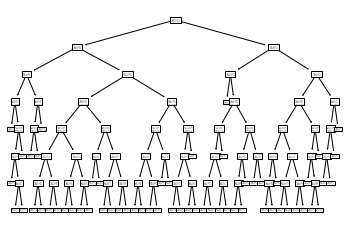

In [262]:
from sklearn import tree
# clf.fit(X, y)
tree.plot_tree(clf.fit(X,y))
plt.show()

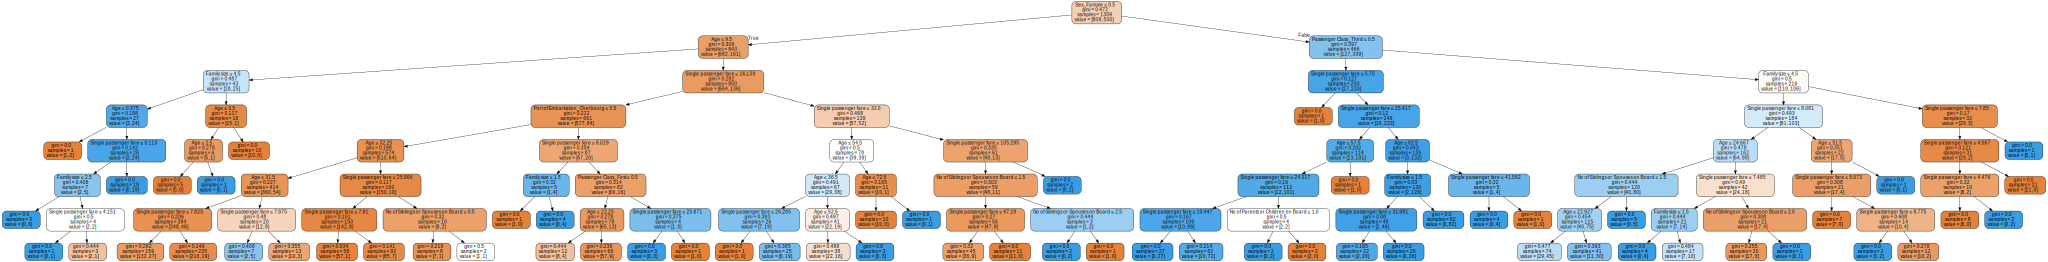

In [263]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
#                                 class_names=['alive, dead'],
                                filled=True, rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [264]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf, out_file='tree.dot', 
                feature_names=X.columns,
#                 class_names = [0,1],
                rounded = True, proportion = False, 
                precision = 2, 
                filled = True
               )

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')
plt.show()

First level of the tree divides by sex, and this coincides with my intuition: chances of women were much higher then chances of men. Second level splitting feature is age for men and passenger class for women: 1st and 2nd class women had much more chances than women from the 3rd class. 3rd level splits by fare and size of family. Among adult men high price of ticket gave better chances. Women from big families and from 3rd class had almost no chances.
So, 4 features were the main: sex, age, fare and class. It corresponds with the previous EDA analysis.
First, women survive more often than men. Second, there is a relationship between class and survival: the ratio survived/not survived is highest in the first class, less in the second, and the least in the third. 1st class: women survived almost all. 2nd class: most women  survived, few men. 3rd class: half of women survived, few men. For women, the survival rate strongly depends on the class, for men there is also a dependency. 